### This Lab Assignment is done by CS20B1044 Avinash R Changrani

Dataset - Can be downloaded from keras or pytorch directly similar to MNIST.

Implement the CNN for classifying the flowers from IRIS Flowers Image dataset.
- Implement a custom CNN using Conv2D layers (the configuration of the model can be followed from the tutorial or can be changed as well)
- Implement the Transfer Learning Method for VGG16.


In [39]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.utils import to_categorical
from keras.applications import VGG16
import os

In [40]:
# load iris dataset from the directory iris and then get the images from the 3 classes directories

iris_setosa = os.listdir('./IRIS/iris-setosa')
iris_versicolor = os.listdir('./IRIS/iris-versicolour')
iris_virginica = os.listdir('./IRIS/iris-virginica')

# load the images from the directories
iris_setosa_images = [plt.imread('./IRIS/iris-setosa/'+img) for img in iris_setosa]
iris_versicolor_images = [plt.imread('./IRIS/iris-versicolour/'+img) for img in iris_versicolor]
iris_virginica_images = [plt.imread('./IRIS/iris-virginica/'+img) for img in iris_virginica]

# print the number of images in each class and the shape of the images
print('Number of images in iris setosa class:', len(iris_setosa_images))
print('Number of images in iris versicolor class:', len(iris_versicolor_images))
print('Number of images in iris virginica class:', len(iris_virginica_images))

print('Shape of the images:', iris_setosa_images[0].shape)

Number of images in iris setosa class: 67
Number of images in iris versicolor class: 269
Number of images in iris virginica class: 85
Shape of the images: (256, 256, 3)


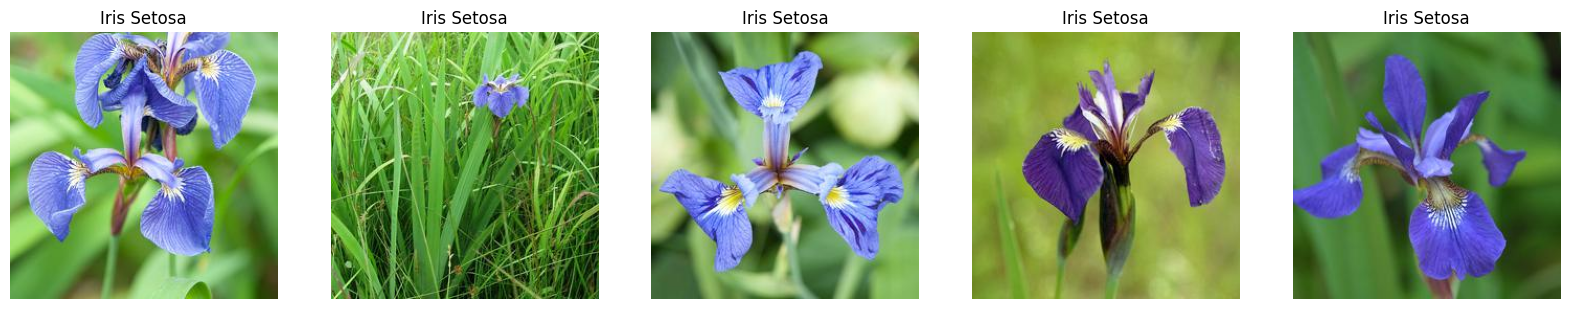

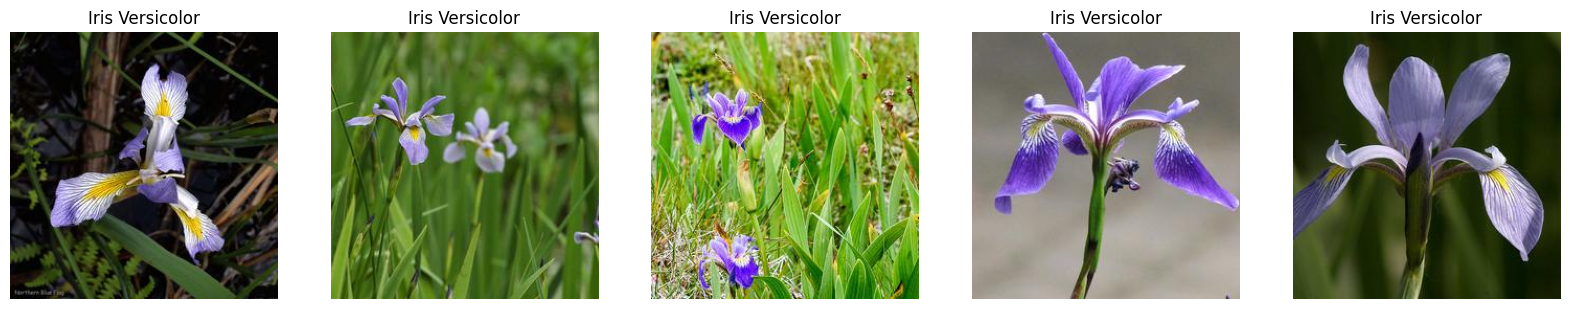

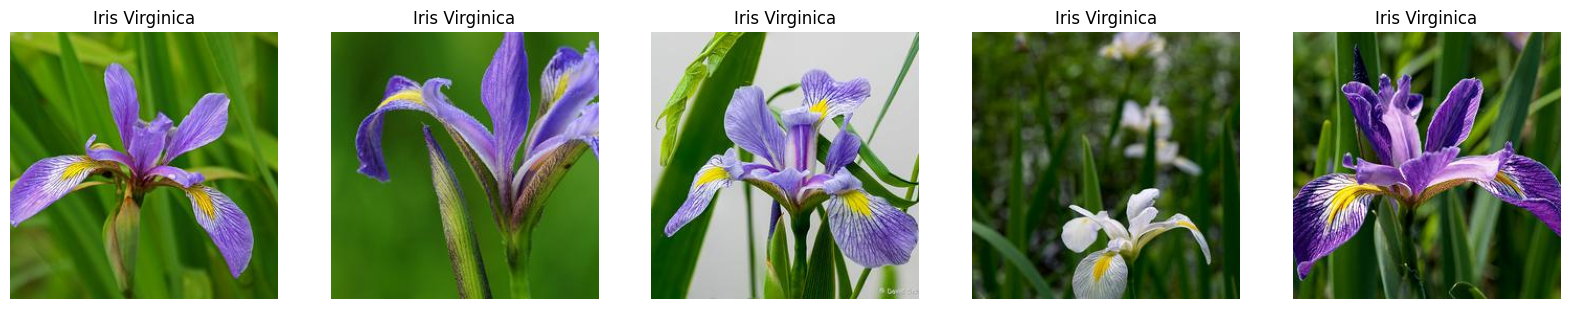

In [41]:
# display the images
plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(iris_setosa_images[i])
    plt.title('Iris Setosa')
    plt.axis('off')

plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(iris_versicolor_images[i])
    plt.title('Iris Versicolor')
    plt.axis('off')

plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(iris_virginica_images[i])
    plt.title('Iris Virginica')
    plt.axis('off')

In [42]:
# create a dataframe to store the images and their labels and split the data into training and validation sets
data = []
for img in iris_setosa_images:
    data.append([img, 0])

for img in iris_versicolor_images:
    data.append([img, 1])

for img in iris_virginica_images:
    data.append([img, 2])

data = pd.DataFrame(data, columns=['image', 'label'])
data = data.sample(frac=1).reset_index(drop=True)

X = np.array(data['image'].tolist())
y = np.array(data['label'].tolist())


from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = Sequential()

# input layer
model.add(InputLayer(input_shape=(256, 256, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())

# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(units=3, activation='softmax'))

In [45]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
# train the model for 25 epochs
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
11/11 [==============================] - 7s 160ms/step - loss: 1.6612 - accuracy: 0.5089 - val_loss: 13.4796 - val_accuracy: 0.6118
Epoch 2/25
11/11 [==============================] - 0s 43ms/step - loss: 0.7865 - accuracy: 0.7083 - val_loss: 9.0957 - val_accuracy: 0.6118
Epoch 3/25
11/11 [==============================] - 0s 44ms/step - loss: 0.4813 - accuracy: 0.8244 - val_loss: 5.1107 - val_accuracy: 0.6118
Epoch 4/25
11/11 [==============================] - 1s 47ms/step - loss: 0.2585 - accuracy: 0.8958 - val_loss: 4.6897 - val_accuracy: 0.6118
Epoch 5/25
11/11 [==============================] - 0s 44ms/step - loss: 0.1973 - accuracy: 0.9345 - val_loss: 5.1137 - val_accuracy: 0.6118
Epoch 6/25
11/11 [==============================] - 0s 43ms/step - loss: 0.1966 - accuracy: 0.9524 - val_loss: 6.0373 - val_accuracy: 0.6000
Epoch 7/25
11/11 [==============================] - 0s 44ms/step - loss: 0.1190 - accuracy: 0.9643 - val_loss: 4.4909 - val_accuracy: 0.6000
Epoch 8/25


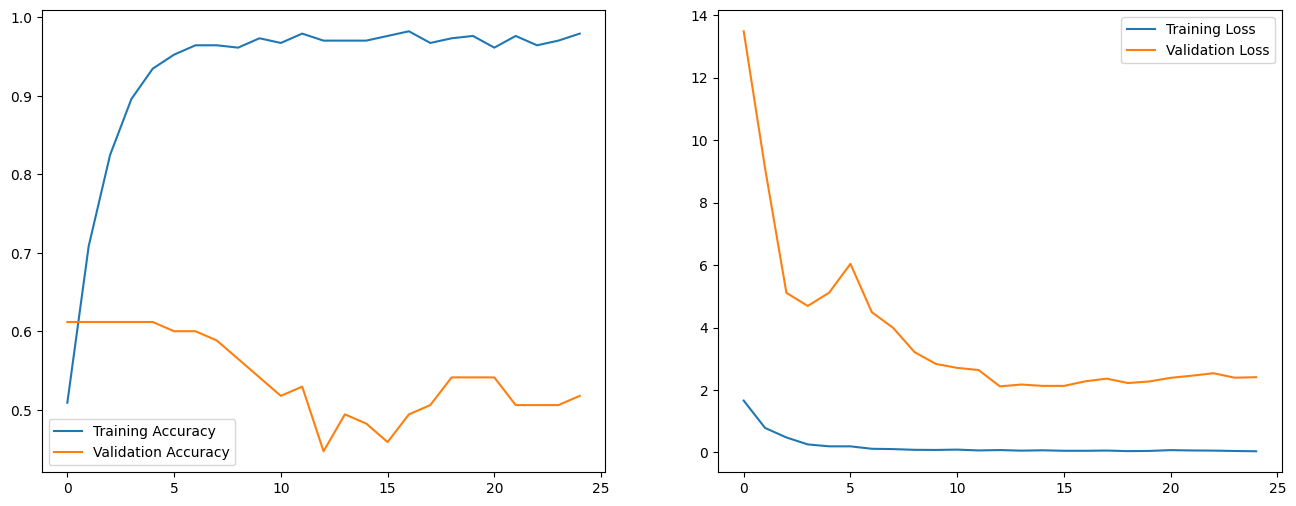

In [47]:
# plot the training and validation accuracy and loss of the model
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [48]:
# Transfer Learning using VGG16 model
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [49]:
# Generate the features from the VGG16 model
X_train_features = vgg.predict(X_train)
X_val_features = vgg.predict(X_val)

3/3 [==============================] - 0s 137ms/step


In [50]:
# Perform One Hot Encoding for label vectors

train_labels = to_categorical(y_train)

val_labels = to_categorical(y_val)

In [51]:
train_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [52]:
# classify the images using the features extracted from VGG16 model

model_2 = keras.models.Sequential([
    Flatten(input_shape=(8, 8, 512)),
    Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    Dense(3, activation='softmax')
])

# compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               16777728  
                                                                 
 batch_normalization_5 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 16781315 (64.02 MB)
Trainable params: 16780291 (64.01 MB)
Non-trainable params: 1024 (4.00 KB)
___________

Epoch 1/25
11/11 [==============================] - 2s 30ms/step - loss: 2.8299 - accuracy: 0.3810 - val_loss: 23.3755 - val_accuracy: 0.2000
Epoch 2/25
11/11 [==============================] - 0s 12ms/step - loss: 0.8238 - accuracy: 0.7500 - val_loss: 8.8494 - val_accuracy: 0.3059
Epoch 3/25
11/11 [==============================] - 0s 12ms/step - loss: 0.4598 - accuracy: 0.8423 - val_loss: 4.6002 - val_accuracy: 0.4118
Epoch 4/25
11/11 [==============================] - 0s 13ms/step - loss: 0.2441 - accuracy: 0.9405 - val_loss: 3.6412 - val_accuracy: 0.4118
Epoch 5/25
11/11 [==============================] - 0s 13ms/step - loss: 0.1541 - accuracy: 0.9435 - val_loss: 3.3193 - val_accuracy: 0.4118
Epoch 6/25
11/11 [==============================] - 0s 12ms/step - loss: 0.1373 - accuracy: 0.9613 - val_loss: 3.1316 - val_accuracy: 0.4353
Epoch 7/25
11/11 [==============================] - 0s 14ms/step - loss: 0.1457 - accuracy: 0.9524 - val_loss: 2.7546 - val_accuracy: 0.4471
Epoch 8/25
1

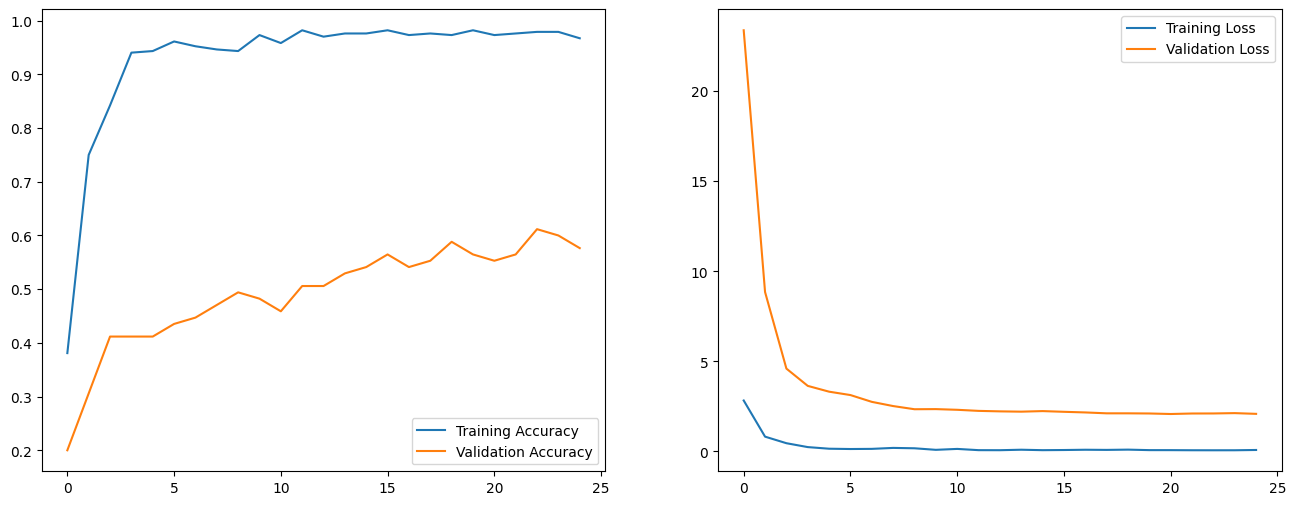

In [54]:
# train model using features generated from VGG16 model

history_2 = model_2.fit(X_train_features, train_labels, epochs=25, validation_data=(X_val_features, val_labels))

# plot the accuracy and loss of the models
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.legend()
